In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import random

In [238]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 3.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=f122292570f4144dbfa905d9fef0aab262e4adde39bb8b3172591c6f21959747
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [239]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel('U.S._Offense_Type_by_Agency_2012.xlsx')


Saving U.S._Offense_Type_by_Agency_2012.xlsx to U.S._Offense_Type_by_Agency_2012 (3).xlsx


### Data Cleaning and Pre-processing

In [240]:
df = df.drop([0,1,2],axis = 0)

In [241]:
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header 

In [242]:
df

3,NaN,NaN,NaN,NaN,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
4,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
5,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
6,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
7,NaN,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
8,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238,NaN,NaN,St. Croix Tribal,NaN,14,1,10,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,11
5239,1Population figures are published only for the...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5240,2This agency reported 24 Murder and Nonneglige...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5241,3Student enrollment figures were not available.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
s = pd.Series(df.columns)

print(s)


0                                                 NaN
1                                                 NaN
2                                                 NaN
3                                                 NaN
4                                   Assault\nOffenses
5                                 Aggravated\nAssault
6                                     Simple\nAssault
7                                        Intimidation
8                                  Homicide\nOffenses
9                Murder and Nonnegligent Manslaughter
10                            Negligent\nManslaughter
11                              Justifiable\nHomicide
12                             Kidnapping/\nAbduction
13                                      Sex\nOffenses
14                                               Rape
15                                             Sodomy
16                   Sexual\nAssault\nWith An\nObject
17                                           Fondling
18                        Se

In [244]:
s = s.fillna('unnamed:' + (s.groupby(s.isnull()).cumcount() + 1).astype(str))
print(s)
df.columns = s

0                                           unnamed:1
1                                           unnamed:2
2                                           unnamed:3
3                                           unnamed:4
4                                   Assault\nOffenses
5                                 Aggravated\nAssault
6                                     Simple\nAssault
7                                        Intimidation
8                                  Homicide\nOffenses
9                Murder and Nonnegligent Manslaughter
10                            Negligent\nManslaughter
11                              Justifiable\nHomicide
12                             Kidnapping/\nAbduction
13                                      Sex\nOffenses
14                                               Rape
15                                             Sodomy
16                   Sexual\nAssault\nWith An\nObject
17                                           Fondling
18                        Se

In [245]:
df = df.rename(columns={"unnamed:1" : "State","unnamed:2" : "Agency Type","unnamed:3" : "Agency Name","unnamed:4" : "Population"})

In [246]:
x = df.columns

In [247]:
x

Index(['State', 'Agency Type', 'Agency Name', 'Population',
       'Assault\nOffenses', 'Aggravated\nAssault', 'Simple\nAssault',
       'Intimidation', 'Homicide\nOffenses',
       'Murder and Nonnegligent Manslaughter', 'Negligent\nManslaughter',
       'Justifiable\nHomicide', 'Kidnapping/\nAbduction', 'Sex\nOffenses',
       'Rape', 'Sodomy', 'Sexual\nAssault\nWith An\nObject', 'Fondling',
       'Sex\nOffenses,\nNonforcible', 'Incest', 'Statutory\nRape', 'Arson',
       'Bribery', 'Burglary/\nBreaking &\nEntering',
       'Counter-\nfeiting/\nForgery', 'Destruction/\nDamage/\nVandalism',
       'Embezzle-\nment', 'Extortion/\nBlackmail', 'Fraud\nOffenses',
       'False\nPretenses/\nSwindle/\nConfidence\nGame',
       'Credit Card/\nAutomated\nTeller\nMachine Fraud', 'Imperson-\nation',
       'Welfare\nFraud', 'Wire\nFraud', 'Larceny-\nTheft\nOffenses',
       'Pocket-\npicking', 'Purse-\nsnatching', 'Shop-\nlifting',
       'Theft\nFrom\nBuilding', 'Theft\nFrom\nCoin-\noperated\

In [248]:
x = ['State', 'Agency Type', 'Agency Name', 'Population',
       'Assault Offenses', 'Aggravated Assault', 'Simple Assault',
       'Intimidation', 'Homicide Offenses',
       'Murder and Nonnegligent Manslaughter', 'Negligent Manslaughter',
       'Justifiable Homicide', 'Kidnapping Abduction', 'Sex Offenses',
       'Rape', 'Sodomy', 'Sexual Assault With An Object', 'Fondling',
       'Sex Offenses, Nonforcible', 'Incest', 'Statutory Rape', 'Arson',
       'Bribery', 'Burglary Breaking & Entering',
       'Counter-feiting Forgery', 'Destruction Damage Vandalism',
       'Embezzle-ment', 'Extortion Blackmail', 'Fraud Offenses',
       'False Pretenses Swindle Confidence Game',
       'Credit Card Automated Teller Machine Fraud', 'Impersonation',
       'Welfare Fraud', 'Wire Fraud', 'Larceny Theft Offenses',
       'Pocket-picking', 'Purse-snatching', 'Shop-lifting',
       'Theft From Building', 'Theft From Coin-operated Machine',
       'Theft From Motor Vehicle',
       'Theft of Motor Vehicle Parts or Accessories',
       'All Other Larceny', 'Motor Vehicle Theft', 'Robbery',
       'Stolen Property Offenses ', 'Drug Narcotic Offenses',
       'Drug Narcotic Violations', 'Drug Equipment Violations',
       'Gambling Offenses', 'Betting/Wagering',
       'Operating/Promoting/Assisting/Gambling',
       'Gambling Equipment Violations', 'Sports Tampering',
       'Pornography/Obscene Material', 'Prost-itution Offenses',
       'Prostitution', 'Assisting or Promoting Prostitution',
       'Weapon Law Violations']

In [249]:
df.columns = x

In [250]:
df

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Gambling Offenses,Betting/Wagering,Operating/Promoting/Assisting/Gambling,Gambling Equipment Violations,Sports Tampering,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Assisting or Promoting Prostitution,Weapon Law Violations
4,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
5,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
6,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
7,NaN,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
8,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238,NaN,NaN,St. Croix Tribal,NaN,14,1,10,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,11
5239,1Population figures are published only for the...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5240,2This agency reported 24 Murder and Nonneglige...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5241,3Student enrollment figures were not available.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [251]:
df = df.reset_index(drop=True)

In [252]:
df

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Gambling Offenses,Betting/Wagering,Operating/Promoting/Assisting/Gambling,Gambling Equipment Violations,Sports Tampering,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Assisting or Promoting Prostitution,Weapon Law Violations
0,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
1,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
2,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
3,NaN,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
4,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5234,NaN,NaN,St. Croix Tribal,NaN,14,1,10,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,11
5235,1Population figures are published only for the...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5236,2This agency reported 24 Murder and Nonneglige...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5237,3Student enrollment figures were not available.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
df.head(20)

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Gambling Offenses,Betting/Wagering,Operating/Promoting/Assisting/Gambling,Gambling Equipment Violations,Sports Tampering,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Assisting or Promoting Prostitution,Weapon Law Violations
0,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
1,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
2,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
3,NaN,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
4,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4
5,NaN,NaN,Arkadelphia,10698,274,35,178,61,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
6,NaN,NaN,Ashdown,4680,72,14,57,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
7,NaN,NaN,Atkins,3057,22,1,13,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,Austin,2076,14,2,10,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,NaN,NaN,Bald Knob,2950,71,12,29,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
df.isna()

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Gambling Offenses,Betting/Wagering,Operating/Promoting/Assisting/Gambling,Gambling Equipment Violations,Sports Tampering,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Assisting or Promoting Prostitution,Weapon Law Violations
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,True,True,True,False
2,True,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,True,True,True,False
3,True,False,False,True,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5234,True,True,False,True,False,False,False,False,True,True,...,True,True,True,True,True,False,True,True,True,False
5235,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5236,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5237,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [255]:
df = df.drop([5235,5236,5237,5238],axis = 0)

In [256]:
df['State'] = df['State'].fillna(method = 'ffill')

In [257]:
df['Agency Type'] = df['Agency Type'].fillna(method = 'ffill')

In [258]:
df

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Gambling Offenses,Betting/Wagering,Operating/Promoting/Assisting/Gambling,Gambling Equipment Violations,Sports Tampering,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Assisting or Promoting Prostitution,Weapon Law Violations
0,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
1,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
2,ARIZONA,Cities,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
3,ARIZONA,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
4,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,WISCONSIN,Nonmetropolitan Counties,Sauk,NaN,80,14,63,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
5231,WISCONSIN,Nonmetropolitan Counties,Sawyer,NaN,79,21,56,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,15
5232,WISCONSIN,Nonmetropolitan Counties,Vilas,NaN,42,3,39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5233,WISCONSIN,Other Agencies - Tribal,Oneida Tribal,NaN,56,14,39,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [259]:
(df['Population'].isna().sum())/5234

0.3511654566297287

In [260]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [261]:
missing_value_df[missing_value_df['percent_missing']> 95]

,column_name,percent_missing
Negligent Manslaughter,Negligent Manslaughter,97.153773
Justifiable Homicide,Justifiable Homicide,98.490926
Bribery,Bribery,96.275072
Gambling Offenses,Gambling Offenses,95.816619
Betting/Wagering,Betting/Wagering,98.567335
Operating/Promoting/Assisting/Gambling,Operating/Promoting/Assisting/Gambling,97.478510
Gambling Equipment Violations,Gambling Equipment Violations,98.510029
Sports Tampering,Sports Tampering,99.942693


In [262]:
# Dropping columns that have >95% NaN values

df = df.drop('Justifiable Homicide'	, axis = 1)
df = df.drop('Bribery'	, axis = 1)
df = df.drop('Gambling Offenses'	, axis = 1)
df = df.drop('Betting/Wagering'	, axis = 1)
df = df.drop('Operating/Promoting/Assisting/Gambling'	, axis = 1)
df = df.drop('Gambling Equipment Violations'	, axis = 1)
df = df.drop('Sports Tampering'	, axis = 1)

In [263]:
df = df.drop('Negligent Manslaughter'	, axis = 1)

In [264]:
df.shape

(5235, 51)

In [265]:
df.head()

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Robbery,Stolen Property Offenses,Drug Narcotic Offenses,Drug Narcotic Violations,Drug Equipment Violations,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Assisting or Promoting Prostitution,Weapon Law Violations
0,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,46,29,495,339,156,4,NaN,NaN,NaN,26
1,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,21,28,308,152,156,1,NaN,NaN,NaN,25
2,ARIZONA,Cities,Gilbert,214264,1242,123,892,227,5,5,...,59,100,2069,979,1090,16,NaN,NaN,NaN,75
3,ARIZONA,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,10,24,437,208,229,5,2,1,1,40
4,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,1,9,66,44,22,1,NaN,NaN,NaN,4


In [266]:
df_numeric = df.drop(['State','Agency Type','Agency Name'], axis = 1)
df_numeric

,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,Kidnapping Abduction,Sex Offenses,Rape,...,Robbery,Stolen Property Offenses,Drug Narcotic Offenses,Drug Narcotic Violations,Drug Equipment Violations,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Assisting or Promoting Prostitution,Weapon Law Violations
0,82332,870,25,594,251,2,2,2,25,13,...,46,29,495,339,156,4,NaN,NaN,NaN,26
1,36986,559,96,381,82,1,1,14,35,13,...,21,28,308,152,156,1,NaN,NaN,NaN,25
2,214264,1242,123,892,227,5,5,54,79,19,...,59,100,2069,979,1090,16,NaN,NaN,NaN,75
3,NaN,555,94,376,85,26,26,17,39,8,...,10,24,437,208,229,5,2,1,1,40
4,5439,197,11,108,78,NaN,NaN,1,4,3,...,1,9,66,44,22,1,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,NaN,80,14,63,3,NaN,NaN,3,37,7,...,2,4,196,95,101,NaN,NaN,NaN,NaN,10
5231,NaN,79,21,56,2,NaN,NaN,NaN,6,3,...,1,2,55,32,23,3,NaN,NaN,NaN,15
5232,NaN,42,3,39,NaN,NaN,NaN,NaN,6,NaN,...,1,NaN,49,49,NaN,NaN,NaN,NaN,NaN,13
5233,NaN,56,14,39,3,NaN,NaN,1,4,1,...,NaN,NaN,92,57,35,NaN,NaN,NaN,NaN,3


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


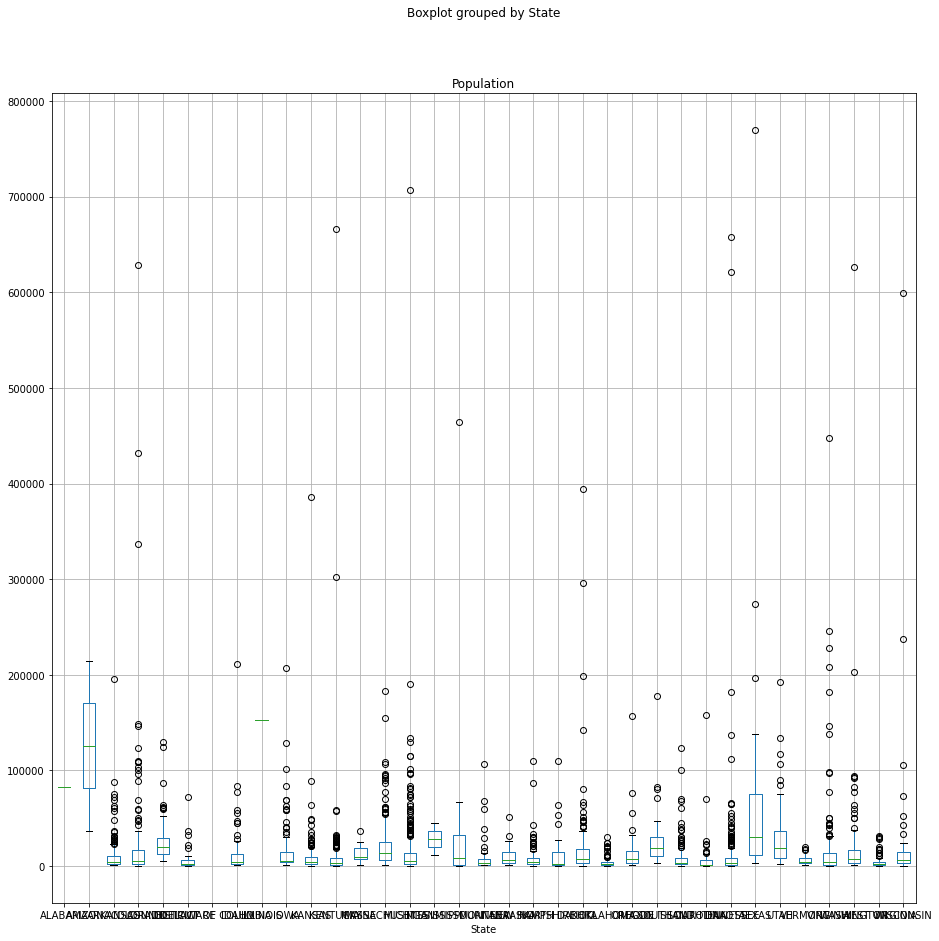

In [267]:
df.boxplot(column='Population', by='State', figsize=(15,15))

In [268]:
(df['Population'].isna().sum())/5234

0.3511654566297287

In [269]:
df_population = df['Population'].dropna(axis = 0)

In [270]:
df_population.shape

(3397,)

In [271]:
df = df.iloc[df_population.index]

In [272]:
df

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Robbery,Stolen Property Offenses,Drug Narcotic Offenses,Drug Narcotic Violations,Drug Equipment Violations,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Assisting or Promoting Prostitution,Weapon Law Violations
0,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,46,29,495,339,156,4,NaN,NaN,NaN,26
1,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,21,28,308,152,156,1,NaN,NaN,NaN,25
2,ARIZONA,Cities,Gilbert,214264,1242,123,892,227,5,5,...,59,100,2069,979,1090,16,NaN,NaN,NaN,75
4,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,1,9,66,44,22,1,NaN,NaN,NaN,4
5,ARKANSAS,Cities,Arkadelphia,10698,274,35,178,61,5,5,...,3,2,44,37,7,NaN,NaN,NaN,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,WISCONSIN,Cities,Waupun,11379,23,6,17,NaN,NaN,NaN,...,NaN,NaN,62,28,34,2,NaN,NaN,NaN,5
5203,WISCONSIN,Cities,Westfield,1259,2,NaN,1,1,NaN,NaN,...,1,NaN,13,9,4,NaN,NaN,NaN,NaN,1
5204,WISCONSIN,Cities,West Salem,4849,12,3,9,NaN,NaN,NaN,...,NaN,NaN,47,22,25,1,NaN,NaN,NaN,2
5205,WISCONSIN,Cities,Woodruff,2049,8,2,6,NaN,NaN,NaN,...,NaN,NaN,32,17,15,NaN,NaN,NaN,NaN,2


In [273]:
missing_value_df.sort_values('percent_missing')

,column_name,percent_missing
State,State,0.000000
Agency Type,Agency Type,0.000000
Agency Name,Agency Name,0.000000
Larceny Theft Offenses,Larceny Theft Offenses,7.277937
Assault Offenses,Assault Offenses,8.825215
Drug Narcotic Offenses,Drug Narcotic Offenses,9.207259
Drug Narcotic Violations,Drug Narcotic Violations,9.742120
All Other Larceny,All Other Larceny,10.085960
Destruction Damage Vandalism,Destruction Damage Vandalism,10.200573
Simple Assault,Simple Assault,11.232092


In [274]:
# Dropping NaN values > 90%

df = df.drop('Incest'	, axis = 1)
df = df.drop('Extortion Blackmail'	, axis = 1)
df = df.drop('Assisting or Promoting Prostitution'	, axis = 1)
df = df.drop('Welfare Fraud'	, axis = 1)

In [275]:
#Replace all Nan values with 0 in all columns that come after 'Population'
df = df.fillna(0)

In [276]:
df

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Motor Vehicle Theft,Robbery,Stolen Property Offenses,Drug Narcotic Offenses,Drug Narcotic Violations,Drug Equipment Violations,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Weapon Law Violations
0,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,88,46,29,495,339,156,4,0,0,26
1,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,68,21,28,308,152,156,1,0,0,25
2,ARIZONA,Cities,Gilbert,214264,1242,123,892,227,5,5,...,171,59,100,2069,979,1090,16,0,0,75
4,ARKANSAS,Cities,Alma,5439,197,11,108,78,0,0,...,7,1,9,66,44,22,1,0,0,4
5,ARKANSAS,Cities,Arkadelphia,10698,274,35,178,61,5,5,...,7,3,2,44,37,7,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,WISCONSIN,Cities,Waupun,11379,23,6,17,0,0,0,...,2,0,0,62,28,34,2,0,0,5
5203,WISCONSIN,Cities,Westfield,1259,2,0,1,1,0,0,...,0,1,0,13,9,4,0,0,0,1
5204,WISCONSIN,Cities,West Salem,4849,12,3,9,0,0,0,...,6,0,0,47,22,25,1,0,0,2
5205,WISCONSIN,Cities,Woodruff,2049,8,2,6,0,0,0,...,1,0,0,32,17,15,0,0,0,2


In [277]:
df.to_csv('data.csv')

### Exploratrory Data Analysis

#### a. Top 5 states with highest number of Assault offenses registered in all the agency types except cities. (Show pivot of sub-types of Assault offenses)

In [278]:
df_assault_offense = df[df['Agency Type']!='Cities'].groupby('State')['Assault Offenses'].nunique()
df_assault_offenses = df_assault_offense.sort_values(ascending=False).head(5)


In [279]:
df_assault_offenses

State
VIRGINIA          22
MICHIGAN          18
SOUTH CAROLINA    17
TENNESSEE         12
ARKANSAS           8
Name: Assault Offenses, dtype: int64

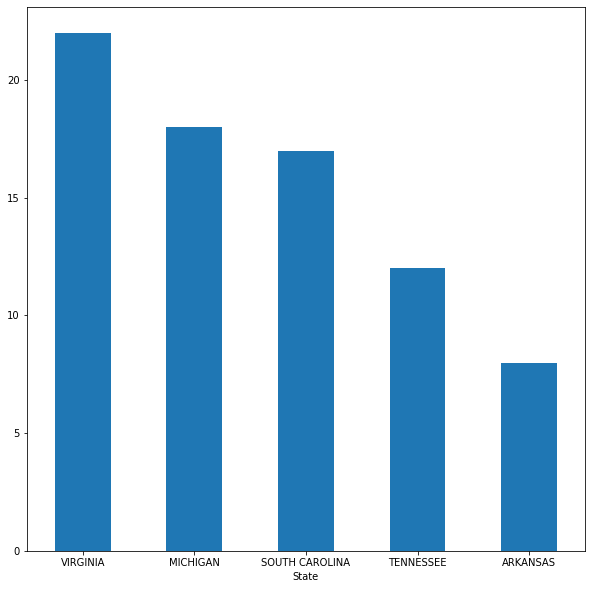

In [280]:
# Top 5 States with highest number of Assault Offenses
ax = df_assault_offenses.plot.bar(x='lab', y='val', rot=0, figsize = (10,10))

#### b. Which category of crimes were most registered in universities?

In [281]:
df_universities = df[df['Agency Type'] == 'Universities and Colleges']
df_universities

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Motor Vehicle Theft,Robbery,Stolen Property Offenses,Drug Narcotic Offenses,Drug Narcotic Violations,Drug Equipment Violations,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Weapon Law Violations
149,ARKANSAS,Universities and Colleges,"Arkansas State University, Jonesboro",13900,30,4,11,15,0,0,...,1,1,3,12,11,1,0,0,0,1
150,ARKANSAS,Universities and Colleges,Arkansas Tech University,10464,10,1,2,7,0,0,...,0,1,1,8,4,4,0,0,0,0
151,ARKANSAS,Universities and Colleges,Henderson State University,3774,18,2,9,7,0,0,...,1,0,0,3,3,0,0,0,0,0
153,ARKANSAS,Universities and Colleges,Fayetteville,23199,54,6,22,26,0,0,...,12,3,3,155,84,71,0,0,0,5
154,ARKANSAS,Universities and Colleges,Little Rock,13068,48,7,22,19,0,0,...,3,4,12,121,95,26,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,WEST VIRGINIA,Universities and Colleges,Shepherd University,4393,6,0,5,1,0,0,...,0,1,0,7,7,0,0,0,0,0
5022,WEST VIRGINIA,Universities and Colleges,West Liberty University,2789,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5023,WEST VIRGINIA,Universities and Colleges,West Virginia State University,2827,15,0,10,5,0,0,...,2,0,0,2,2,0,0,0,0,3
5024,WEST VIRGINIA,Universities and Colleges,West Virginia University,29617,65,19,20,26,0,0,...,0,3,0,152,152,0,0,0,0,0


In [282]:
df_universities1 = df_universities.iloc[:,4:].sum(axis=0) 
df_universities2 = df_universities1.sort_values(ascending= False)

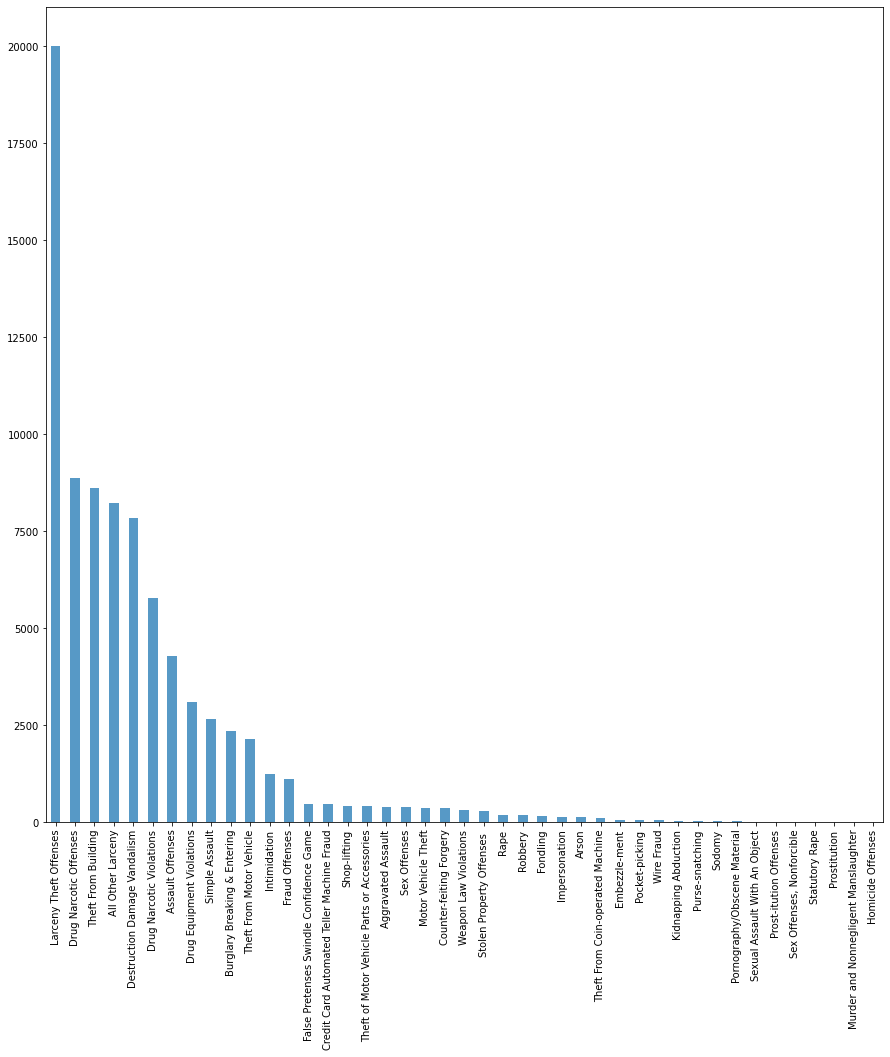

In [283]:
ax1 = df_universities2.plot.bar(x='lab', y='val', figsize = (15,15), alpha = 0.75, rot = 90)

From the plot its clearly visible that "Larceny Theft Offenses" is the category which is most frequent in universities.

### c. Compare offenses at Michigan State University with offenses at all other universities.

In [284]:
df_michigan = df_universities[df_universities['Agency Name'] == 'Michigan State University']
df_not_michigan = df_universities[df_universities['Agency Name'] != 'Michigan State University']

In [285]:
df_michigan

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Motor Vehicle Theft,Robbery,Stolen Property Offenses,Drug Narcotic Offenses,Drug Narcotic Violations,Drug Equipment Violations,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Weapon Law Violations
2070,MICHIGAN,Universities and Colleges,Michigan State University,47825,68,5,54,9,0,0,...,11,1,6,185,185,0,0,1,1,7


In [286]:
df_mic = df_michigan.iloc[:,4:].sum(axis=0) 
df_mic

Assault Offenses                                68
Aggravated Assault                               5
Simple Assault                                  54
Intimidation                                     9
Homicide Offenses                                0
Murder and Nonnegligent Manslaughter             0
Kidnapping Abduction                             0
Sex Offenses                                    12
Rape                                             8
Sodomy                                           1
Sexual Assault With An Object                    1
Fondling                                         2
Sex Offenses, Nonforcible                        0
Statutory Rape                                   0
Arson                                            1
Burglary Breaking & Entering                    47
Counter-feiting Forgery                          2
Destruction Damage Vandalism                    72
Embezzle-ment                                    3
Fraud Offenses                 

In [287]:
df_mic.sort_values(ascending= False)


Larceny Theft Offenses                         586
All Other Larceny                              386
Drug Narcotic Violations                       185
Drug Narcotic Offenses                         185
Theft From Building                            162
Destruction Damage Vandalism                    72
Assault Offenses                                68
Simple Assault                                  54
Burglary Breaking & Entering                    47
Fraud Offenses                                  33
Theft From Motor Vehicle                        27
Credit Card Automated Teller Machine Fraud      22
Sex Offenses                                    12
Motor Vehicle Theft                             11
Intimidation                                     9
Rape                                             8
Weapon Law Violations                            7
Stolen Property Offenses                         6
Theft of Motor Vehicle Parts or Accessories      5
Impersonation                  

In [288]:
df_mic = pd.DataFrame(df_mic)
df_mic

,0
Assault Offenses,68
Aggravated Assault,5
Simple Assault,54
Intimidation,9
Homicide Offenses,0
Murder and Nonnegligent Manslaughter,0
Kidnapping Abduction,0
Sex Offenses,12
Rape,8
Sodomy,1


In [289]:
df_not_michigan

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Motor Vehicle Theft,Robbery,Stolen Property Offenses,Drug Narcotic Offenses,Drug Narcotic Violations,Drug Equipment Violations,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Weapon Law Violations
149,ARKANSAS,Universities and Colleges,"Arkansas State University, Jonesboro",13900,30,4,11,15,0,0,...,1,1,3,12,11,1,0,0,0,1
150,ARKANSAS,Universities and Colleges,Arkansas Tech University,10464,10,1,2,7,0,0,...,0,1,1,8,4,4,0,0,0,0
151,ARKANSAS,Universities and Colleges,Henderson State University,3774,18,2,9,7,0,0,...,1,0,0,3,3,0,0,0,0,0
153,ARKANSAS,Universities and Colleges,Fayetteville,23199,54,6,22,26,0,0,...,12,3,3,155,84,71,0,0,0,5
154,ARKANSAS,Universities and Colleges,Little Rock,13068,48,7,22,19,0,0,...,3,4,12,121,95,26,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,WEST VIRGINIA,Universities and Colleges,Shepherd University,4393,6,0,5,1,0,0,...,0,1,0,7,7,0,0,0,0,0
5022,WEST VIRGINIA,Universities and Colleges,West Liberty University,2789,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5023,WEST VIRGINIA,Universities and Colleges,West Virginia State University,2827,15,0,10,5,0,0,...,2,0,0,2,2,0,0,0,0,3
5024,WEST VIRGINIA,Universities and Colleges,West Virginia University,29617,65,19,20,26,0,0,...,0,3,0,152,152,0,0,0,0,0


In [290]:
df_not_michigan_sum = df_not_michigan.iloc[:,4:].sum(axis=0) 

In [291]:
df_not_mich = df_not_michigan_sum.sort_values(ascending= False)


In [292]:
df_notmic = pd.DataFrame(df_not_mich)
df_notmic

,0
Larceny Theft Offenses,19437
Drug Narcotic Offenses,8699
Theft From Building,8467
All Other Larceny,7838
Destruction Damage Vandalism,7759
Drug Narcotic Violations,5603
Assault Offenses,4227
Drug Equipment Violations,3096
Simple Assault,2609
Burglary Breaking & Entering,2301


In [293]:
df_compare = df_notmic

In [294]:
df_compare['Not Michigan'] = df_notmic[0]

In [295]:
df_compare['mic'] = df_mic[0]

In [296]:
df_compare

,0,Not Michigan,mic
Larceny Theft Offenses,19437,19437,586
Drug Narcotic Offenses,8699,8699,185
Theft From Building,8467,8467,162
All Other Larceny,7838,7838,386
Destruction Damage Vandalism,7759,7759,72
Drug Narcotic Violations,5603,5603,185
Assault Offenses,4227,4227,68
Drug Equipment Violations,3096,3096,0
Simple Assault,2609,2609,54
Burglary Breaking & Entering,2301,2301,47


In [297]:
df_compare = df_compare.drop(0,1) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


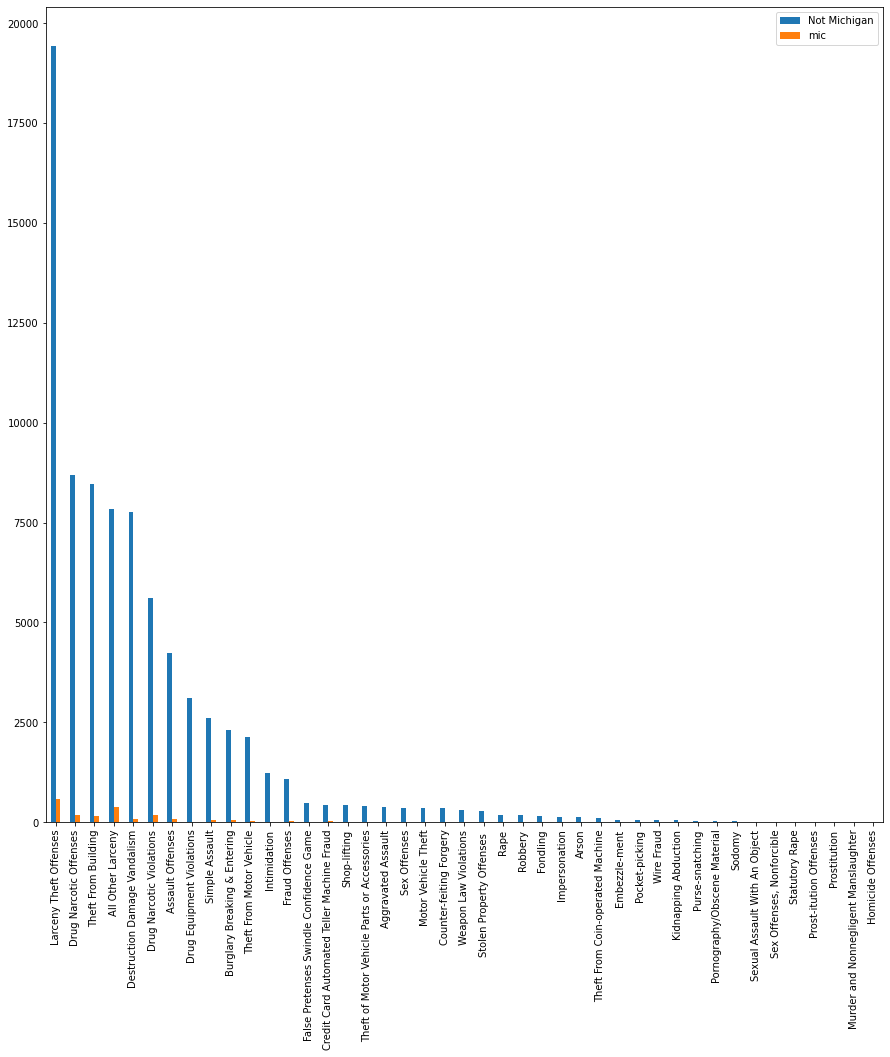

In [298]:
df_compare.plot(kind = 'bar', stacked = False, figsize = (15,15))

In [299]:
df_digital = df[['State','Credit Card Automated Teller Machine Fraud','Wire Fraud']].copy()

In [300]:
digital = df_digital.sum(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [301]:
digital = pd.DataFrame(digital)

In [302]:
df_digital['Digital Crimes'] = digital[0]

In [303]:
df_digital = df_digital.drop(['Credit Card Automated Teller Machine Fraud','Wire Fraud'], axis = 1)

In [304]:
df_top_digital = df_digital.sort_values(by = 'State',
                      axis=0,
                      ascending=True,
                      inplace=False,
                      kind='quicksort',
                      na_position='last')
df_dig_top = df_top_digital.groupby('State').nunique()


In [305]:
df_dig_top.sort_values('Digital Crimes').head(5)

,Digital Crimes
State,
ALABAMA,1
ILLINOIS,1
ARIZONA,2
MISSISSIPPI,2
SOUTH DAKOTA,10


The top 5 provinces with least amount of digital crimes are Alabama, Illinois, Arizona, Mississippi and South Dakota

### e. Which category of agency type and their respective agency names have the highest number of offenses registered per million people?

In [306]:
df['sum'] = df[(df.columns)].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [307]:
df.sort_values('sum',ascending = False)

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Robbery,Stolen Property Offenses,Drug Narcotic Offenses,Drug Narcotic Violations,Drug Equipment Violations,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Weapon Law Violations,sum
4169,TEXAS,Cities,Fort Worth,770101,12150,2820,8222,1108,47,45,...,1284,2,5350,4061,1289,52,263,255,561,847881
1805,MICHIGAN,Cities,Detroit,707096,27276,9447,11693,6136,411,386,...,4860,236,2850,2810,40,5,8,8,1497,827135
3853,TENNESSEE,Cities,Memphis,657436,38998,7621,22320,9057,158,133,...,3399,113,6856,5528,1328,42,868,831,1390,810002
3869,TENNESSEE,Cities,Nashville,620886,24450,5516,13747,5187,68,62,...,1736,15,14921,9592,5329,96,901,899,1061,742065
4839,WASHINGTON,Cities,Seattle,626865,9801,2199,5514,2088,23,23,...,1426,197,1714,1304,410,12,248,237,510,690662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396,SOUTH CAROLINA,Cities,Salem,136,0,0,0,0,0,0,...,0,0,2,2,0,0,0,0,0,140
4409,VIRGINIA,Cities,Glen Lyn,115,1,0,0,1,0,0,...,0,0,5,3,2,0,0,0,0,139
2581,NORTH DAKOTA,Cities,Medora,119,3,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,127
288,COLORADO,Cities,Lakeside,8,3,1,2,0,0,0,...,0,0,17,15,2,0,0,0,1,79


The Agency Type "Cities" with the Agency Name "Fort Worth" has the highest number of offenses registered per million people

### Data Modelling

### (a) Linear Regression

In [308]:
df.columns

Index(['State', 'Agency Type', 'Agency Name', 'Population', 'Assault Offenses',
       'Aggravated Assault', 'Simple Assault', 'Intimidation',
       'Homicide Offenses', 'Murder and Nonnegligent Manslaughter',
       'Kidnapping Abduction', 'Sex Offenses', 'Rape', 'Sodomy',
       'Sexual Assault With An Object', 'Fondling',
       'Sex Offenses, Nonforcible', 'Statutory Rape', 'Arson',
       'Burglary Breaking & Entering', 'Counter-feiting Forgery',
       'Destruction Damage Vandalism', 'Embezzle-ment', 'Fraud Offenses',
       'False Pretenses Swindle Confidence Game',
       'Credit Card Automated Teller Machine Fraud', 'Impersonation',
       'Wire Fraud', 'Larceny Theft Offenses', 'Pocket-picking',
       'Purse-snatching', 'Shop-lifting', 'Theft From Building',
       'Theft From Coin-operated Machine', 'Theft From Motor Vehicle',
       'Theft of Motor Vehicle Parts or Accessories', 'All Other Larceny',
       'Motor Vehicle Theft', 'Robbery', 'Stolen Property Offenses ',
   

In [309]:
cols1 = ['Population', 'Theft From Building',
       'Theft From Coin-operated Machine', 'Theft From Motor Vehicle',
       'Theft of Motor Vehicle Parts or Accessories','Drug Narcotic Offenses', 'Drug Narcotic Violations',
       'Drug Equipment Violations']
temp = df[cols1]


In [310]:
temp = df.iloc[:, 4:]
x = temp.sum(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [311]:
sums = pd.DataFrame(x)
sums

,0
0,93346
1,44030
2,240922
4,7361
5,13116
...,...
5202,12359
5203,1379
5204,5289
5205,2253


In [312]:
y_train = pd.DataFrame()

In [313]:
y_train['Total number of Offenses'] = sums[0]

In [314]:
y_train

,Total number of Offenses
0,93346
1,44030
2,240922
4,7361
5,13116
...,...
5202,12359
5203,1379
5204,5289
5205,2253


In [315]:
random.seed(13)
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [316]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33)

In [317]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [318]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)


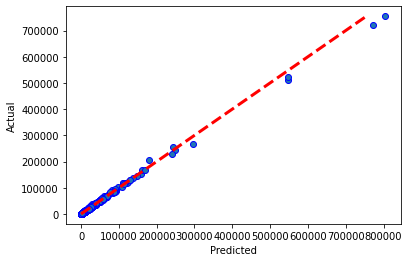

In [319]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [320]:
# model evaluation for testing set
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 713.3672019259211
MSE is 9063746.976048294
R2 score is 0.9955139103367766


### (b) Using Random Forest as our statistical model

In [321]:
df.columns

Index(['State', 'Agency Type', 'Agency Name', 'Population', 'Assault Offenses',
       'Aggravated Assault', 'Simple Assault', 'Intimidation',
       'Homicide Offenses', 'Murder and Nonnegligent Manslaughter',
       'Kidnapping Abduction', 'Sex Offenses', 'Rape', 'Sodomy',
       'Sexual Assault With An Object', 'Fondling',
       'Sex Offenses, Nonforcible', 'Statutory Rape', 'Arson',
       'Burglary Breaking & Entering', 'Counter-feiting Forgery',
       'Destruction Damage Vandalism', 'Embezzle-ment', 'Fraud Offenses',
       'False Pretenses Swindle Confidence Game',
       'Credit Card Automated Teller Machine Fraud', 'Impersonation',
       'Wire Fraud', 'Larceny Theft Offenses', 'Pocket-picking',
       'Purse-snatching', 'Shop-lifting', 'Theft From Building',
       'Theft From Coin-operated Machine', 'Theft From Motor Vehicle',
       'Theft of Motor Vehicle Parts or Accessories', 'All Other Larceny',
       'Motor Vehicle Theft', 'Robbery', 'Stolen Property Offenses ',
   

In [322]:
data = df.iloc[:, 18:]

In [323]:
temp = data.sum(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [324]:
temp

0        91550
1        42822
2       238184
4         6958
5        12540
         ...  
5202     12263
5203      1375
5204      5258
5205      2237
5206      6991
Length: 3397, dtype: int64

In [325]:
temp = pd.DataFrame(temp)

In [326]:
temp

,0
0,91550
1,42822
2,238184
4,6958
5,12540
...,...
5202,12263
5203,1375
5204,5258
5205,2237


In [327]:
data['y'] = temp[0]

In [328]:
data

,Arson,Burglary Breaking & Entering,Counter-feiting Forgery,Destruction Damage Vandalism,Embezzle-ment,Fraud Offenses,False Pretenses Swindle Confidence Game,Credit Card Automated Teller Machine Fraud,Impersonation,Wire Fraud,...,Stolen Property Offenses,Drug Narcotic Offenses,Drug Narcotic Violations,Drug Equipment Violations,Pornography/Obscene Material,Prost-itution Offenses,Prostitution,Weapon Law Violations,sum,y
0,1,391,55,280,70,202,38,109,55,0,...,29,495,339,156,4,0,0,26,87839,91550
1,1,237,58,447,0,162,52,62,48,0,...,28,308,152,156,1,0,0,25,40508,42822
2,25,728,163,2303,20,486,130,150,206,0,...,100,2069,979,1090,16,0,0,75,227593,238184
4,1,99,15,97,0,13,1,10,2,0,...,9,66,44,22,1,0,0,4,6400,6958
5,1,106,19,97,0,34,16,15,3,0,...,2,44,37,7,0,0,0,8,11907,12540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5202,1,24,4,77,1,20,14,6,0,0,...,0,62,28,34,2,0,0,5,11869,12263
5203,0,3,1,7,0,1,1,0,0,0,...,0,13,9,4,0,0,0,1,1319,1375
5204,1,5,2,11,0,1,0,1,0,0,...,0,47,22,25,1,0,0,2,5069,5258
5205,0,2,0,5,0,1,1,0,0,0,...,0,32,17,15,0,0,0,2,2151,2237


In [329]:
x_train_b = data.iloc[:, :-1]

In [330]:
y_train_b = pd.DataFrame()
y_train_b['Total number of Offenses'] = temp[0]

In [331]:
y_train_b

,Total number of Offenses
0,91550
1,42822
2,238184
4,6958
5,12540
...,...
5202,12263
5203,1375
5204,5258
5205,2237


In [332]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(x_train_b, y_train_b, test_size=0.33)

In [333]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_new = sc.fit_transform(X_train_b)
x_test_new = sc.transform(X_test_b)

In [334]:
from sklearn.ensemble import RandomForestRegressor

random.seed(13)
def mod_rf(x_train,y_train,x_test,y_test):
    regressor_rf = RandomForestRegressor()
    regressor_rf.fit(x_train, y_train)
    y_pred = regressor_rf.predict(x_test)
    return y_pred

y_pred_new = mod_rf(x_train_new,y_train_b,x_test_new,y_test_b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [335]:
y_rf = pd.DataFrame(y_pred_new)
y_rf

,0
0,7817.99
1,1848.08
2,266889.61
3,2590.74
4,430.40
...,...
1117,9993.86
1118,5339.50
1119,1209.18
1120,18447.80


Text(0.5, 1.0, 'Random Forest Regression Results')

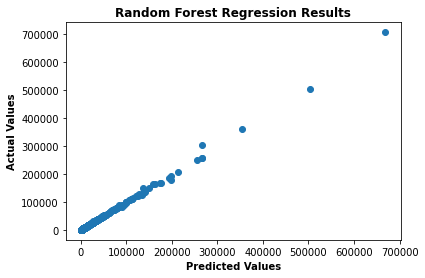

In [336]:
plt.scatter(y_rf[0], y_test_b['Total number of Offenses'])
plt.xlabel('Predicted Values', fontweight = 'bold')
plt.ylabel('Actual Values', fontweight = 'bold')
plt.title('Random Forest Regression Results', fontweight = 'bold')

In [337]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test_b, y_pred_new)
mse = metrics.mean_squared_error(y_test_b, y_pred_new)
r2 = metrics.r2_score(y_test_b, y_pred_new)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 351.70319073083783
MSE is 3587399.141137437
R2 score is 0.9977700293826745
